In [89]:
import pandas as pd
from tqdm.notebook import tqdm
from label_transfer_predictions import LabelTransferPredictor
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
datasets = pd.read_csv('datasets.csv')
datasets = datasets[~datasets['study_id'].isin(['Ho2020M', 'Ho2020F'])]

predictor = LabelTransferPredictor(hyperparams_file='hyperparams.csv',
                               data_dir='exported_matrices',
                               output_dir='label_transfer_model_output/predictions/',
                               verbose=False,
                               random_seed=12345)

In [4]:
for dataset in datasets['study_id'].unique():    
    print(f'Predicting labels for {dataset}')
    predictions = predictor.predict_dataset(dataset)
    predictor.plot_predictions_on_UMAP(dataset, predictions, display=False, save=True)  
    # Save predictions to file
    predictions.to_csv(f'label_transfer_model_output/{dataset}_label_transfer_predictions.csv', index=False)

Predicting labels for Ruf_Zamojski2021F
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step
Predicting labels for Ruf_Zamojski2021M
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Predicting labels for Lopez2021M
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
Predicting labels for Allensworth2021F
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
Predicting labels for Vennekens2

<Figure size 640x480 with 0 Axes>

In [56]:
saliency_maps = {}

for dataset in tqdm(datasets['study_id'].unique(), desc='Computing saliency maps'):
    expr_data = predictor.get_data(dataset)
    saliency_maps[dataset] = predictor.get_saliency(dataset)

Computing saliency maps:   0%|          | 0/10 [00:00<?, ?it/s]

In [97]:
saliency_maps_df = pd.DataFrame()
for dataset in saliency_maps:
    for cluster in saliency_maps[dataset]:
        saliency_maps_df = pd.concat([saliency_maps_df, saliency_maps[dataset][cluster].assign(dataset=dataset, cluster=cluster)])
        
# Sort by saliency score in each cluster/dataset then get the top 10 genes
saliency_maps_df = saliency_maps_df.groupby(['dataset', 'cluster']).apply(lambda x: x.sort_values('Saliency_mean', ascending=False))
saliency_maps_df
# top_genes = saliency_maps_df.groupby(['dataset', 'cluster']).head(10).drop(columns=['cluster'])

# top_genes.to_csv('label_transfer_model_output/saliency_maps.csv', index=False)

Saliency_mean  Saliency_sd  Cluster  \
dataset          cluster Gene                                          
Allensworth2021F 0       Mrm3         0.003518     0.001099        0   
                         Gna11        0.003467     0.001015        0   
                         Jarid2       0.003314     0.000944        0   
                         Slc2a5       0.003217     0.000836        0   
                         Jazf1        0.003205     0.000881        0   
...                                        ...          ...      ...   
Vennekens2021M   3       Dag1        -0.005774     0.001654        3   
                         Gm2a        -0.005874     0.001741        3   
                         Jag2        -0.005926     0.001686        3   
                         Nxf1        -0.006003     0.001323        3   
                         Cbx1        -0.006259     0.001913        3   

                                          dataset  cluster  
dataset          cluster Gene                               
Allensworth2021F 0       Mrm3    Allensworth2021F        0  
                         Gna11   Allensworth2021F        0  
                         Jarid2  Allensworth2021F        0  
                         Slc2a5  Allensworth2021F        0  
                         Jazf1   Allensworth2021F        0  
...                                           ...      ...  
Vennekens2021M   3       Dag1      Vennekens2021M        3  
                         Gm2a      Vennekens2021M        3  
                         Jag2      Vennekens2021M        3  
                         Nxf1      Vennekens2021M        3  
                         Cbx1      Vennekens2021M        3  

[632871 rows x 5 columns]

In [88]:
top_genes

,Saliency_mean,Saliency_sd,Cluster,dataset
0,0.003518,0.001099,0,Allensworth2021F
1,0.003467,0.001015,0,Allensworth2021F
2,0.003314,0.000944,0,Allensworth2021F
3,0.003217,0.000836,0,Allensworth2021F
4,0.003205,0.000881,0,Allensworth2021F
...,...,...,...,...
621773,0.005548,0.001688,3,Vennekens2021M
621774,0.005481,0.001934,3,Vennekens2021M
621775,0.005413,0.001882,3,Vennekens2021M
621776,0.005349,0.001692,3,Vennekens2021M


In [95]:
top_genes[top_genes['dataset'] == 'Cheung2018M']

,Saliency_mean,Saliency_sd,Cluster,dataset
77721,0.005927,0.002008,0,Cheung2018M
77722,0.005548,0.001863,0,Cheung2018M
77723,0.005447,0.001647,0,Cheung2018M
77724,0.005421,0.001941,0,Cheung2018M
77725,0.005387,0.002000,0,Cheung2018M
77726,0.005384,0.001844,0,Cheung2018M
77727,0.005283,0.001721,0,Cheung2018M
77728,0.005192,0.001656,0,Cheung2018M
77729,0.005183,0.001886,0,Cheung2018M
77730,0.005173,0.001515,0,Cheung2018M


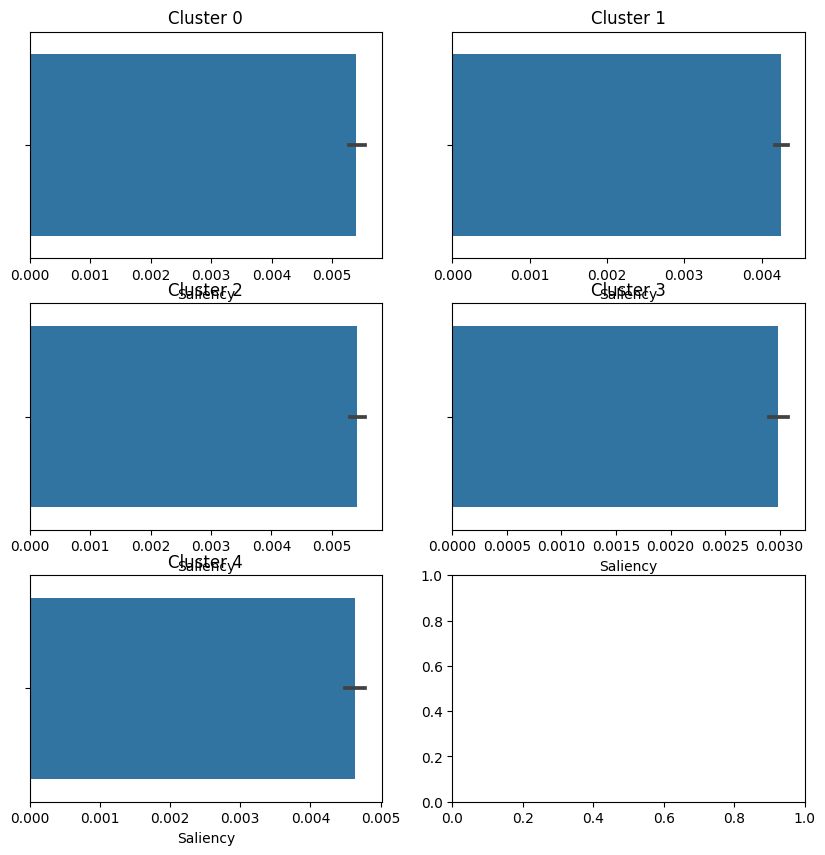

In [94]:
def plot_top_genes(dataset):
    clusters = top_genes[top_genes['dataset'] == dataset]['Cluster'].unique()
    
    fig, ax = plt.subplots(len(clusters)//2 + 1, 2, figsize=(len(clusters)*2, 10))
    for i, cluster in enumerate(clusters):        
        saliency = top_genes[(top_genes['dataset'] == dataset) & (top_genes['Cluster'] == cluster)]['Saliency_mean']
        sns.barplot(x=saliency, ax=ax.flat[i])
        ax.flat[i].set_title(f'Cluster {cluster}')
        ax.flat[i].set_xlabel('Saliency')
    
plot_top_genes('Cheung2018M')

In [ ]:
import shap
import matplotlib.pyplot as plt

model = predictor.models['Cheung2018M']
expr_data_train, expr_data_test, _, _ = predictor._load_data('Cheung2018M')

In [ ]:
feature_names = expr_data_test.columns.values
train_sample = expr_data_train.sample(100).values

# Create a DeepExplainer object
explainer = shap.DeepExplainer(model, train_sample)

# Explain predictions for test data
shap_values = explainer(expr_data_test.values)

In [ ]:
# shap.summary_plot(shap_values[:,:,0], expr_data_test.values, feature_names=feature_names, plot_type="bar")

n_classes = shap_values.shape[2]
fig, ax = plt.subplots(n_classes//3 + 1, 3, figsize=(15, 5*n_classes//3))
for i in range(n_classes):
    shap.summary_plot(shap_values[:,:,1], expr_data_test.values, feature_names=feature_names, plot_type="bar")
    ax.flat[i].set_title(f'Class {i}')    
plt.tight_layout()
plt.show()

### Calculate SHAP values for all datasets/clusters

In [ ]:
def top_SHAP(dataset: str, mean_shap_per_cluster: pd.DataFrame, save: bool = False, plot: bool = True) -> None:
    """
    Gets the top and bottom 10 SHAP values for each cluster. If requested, saves the values to CSV and/or plots them.
    
    Parameters
    ----------
    dataset : str
        The name of the dataset.
    mean_shap_per_cluster : pd.DataFrame
        The mean SHAP values for each cluster.
    save : bool, optional, default = False
        Whether to save the data to a CSV file.
    plot : bool, optional, default = True
        Whether to plot the data.
    """
    mean_shap_per_cluster_long = mean_shap_per_cluster.reset_index().rename(columns={'index': 'Gene'})
    mean_shap_per_cluster_long = mean_shap_per_cluster_long.melt(id_vars = ['Gene'], var_name = 'Cluster', value_name = 'SHAP value')
    mean_shap_per_cluster_long['Positive_SHAP'] = mean_shap_per_cluster_long['SHAP value'] > 0
    mean_shap_per_cluster_long['Positive_SHAP'] = mean_shap_per_cluster_long['Positive_SHAP'].astype(int)
    mean_shap_per_cluster_long = mean_shap_per_cluster_long.dropna(subset=['SHAP value'])
    mean_shap_per_cluster_long = mean_shap_per_cluster_long.sort_values(by=['Cluster', 'SHAP value'], ascending=[True, False])

    if save:
        mean_shap_per_cluster_long.to_csv(os.path.join(output_dir, f"{dataset}_top_bottom_shap.csv"), index=False)
    if plot:
        p = sns.catplot(data = mean_shap_per_cluster_long, x = 'Gene', y = 'SHAP value', col = 'Cluster', 
                        hue = 'Positive_SHAP', kind = 'bar', col_wrap = 2, sharex=False)

        for ax in p.axes.flat:
            for label in ax.get_xticklabels():
                label.set_rotation(90)
            
        p.figure.suptitle(f'Top and bottom 10 features for dataset {dataset}')
        p.figure.tight_layout()
        p.figure.subplots_adjust(top=0.9) 

        p._legend.remove()

        plt.show()

for dataset in set(datasets['study_id']):
    hp = get_hyperparameters(dataset)

    features = models[dataset].get_booster().feature_names

    _, expr_test, _, cluster_test = load_data(dataset)
    print(f"Calculating SHAP values for {dataset}")
    explainer = shap.Explainer(models[dataset])
    shap_values = explainer(expr_test)
    mean_shap_per_cluster = pd.DataFrame()
    for cluster in range(hp['num_classes']):
        # Get the mean SHAP values for each feature, sorted by importance
        sorted_shap = pd.DataFrame(shap_values.values[:,:,cluster], columns = features).mean().sort_values(ascending=False)
        # Get the top and bottom 10 features
        top_and_bottom = pd.concat([sorted_shap.head(10), sorted_shap.tail(10)])
        top_and_bottom.name = f"Cluster {cluster}"
        mean_shap_per_cluster = pd.concat([mean_shap_per_cluster, top_and_bottom], axis=1)
    top_SHAP(dataset, mean_shap_per_cluster, save = True, plot = True)        

In [ ]:
mean_shap_per_cluster_long = mean_shap_per_cluster.reset_index().rename(columns={'index': 'Gene'})
mean_shap_per_cluster_long = mean_shap_per_cluster_long.melt(id_vars = ['Gene'], var_name = 'Cluster', value_name = 'SHAP value')
mean_shap_per_cluster_long['Positive_SHAP'] = mean_shap_per_cluster_long['SHAP value'] > 0
mean_shap_per_cluster_long['Positive_SHAP'] = mean_shap_per_cluster_long['Positive_SHAP'].astype(int)
mean_shap_per_cluster_long = mean_shap_per_cluster_long.dropna(subset=['SHAP value'])
mean_shap_per_cluster_long = mean_shap_per_cluster_long.sort_values(by=['Cluster', 'SHAP value'], ascending=[True, False])

p = sns.catplot(data = mean_shap_per_cluster_long, x = 'Gene', y = 'SHAP value', col = 'Cluster', hue = 'Positive_SHAP', kind = 'bar', col_wrap = 2,
            sharex=False)

for ax in p.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
       
p.figure.suptitle('Top and bottom 10 SHAP values for each cluster for dataset {dataset}')
p.figure.tight_layout()
p.figure.subplots_adjust(top=0.9) 

p._legend.remove()

plt.show()

In [ ]:
def plot_saliency_bars(dataset:str, cluster:int, n_genes:int = 10, where:str = "top") -> None:
    """
    Plot the saliency of the top n_genes genes for a given cluster in a given dataset.
    
    Parameters
    ----------
    
    dataset: str, cluster:int
        The dataset and cluster to plot the saliency for.
    n_genes: int
        The number of genes to plot.
    where: str
        One of "top", "bottom" or "both". Whether to plot the top, bottom or both top and bottom n_genes (in total).    
    """
    
    if where == "top":
        saliency[dataset][cluster].sort_values(by="Saliency_mean", ascending=False).head(n_genes)['Saliency_mean'].plot.bar()
    elif where == "bottom":
        saliency[dataset][cluster].sort_values(by="Saliency_mean", ascending=True).head(n_genes)['Saliency_mean'].plot.bar()
    elif where == "both":
        saliency[dataset][cluster].sort_values(by='Saliency_mean', ascending=False, key=abs).head(n_genes)["Saliency_mean"].sort_values(ascending = False).plot.bar()
    
plot_saliency_bars("Cheung2018M", 0, 10, "top")

In [ ]:
def plot_saliency_on_umap(dataset: str, cluster: int, n_genes: int = 10, where: str = "top") -> None:
    """
    Plot the saliency of the top n_genes genes for a given cluster in a given dataset on the UMAP.

    Parameters
    ----------

    dataset: str, cluster:int
        The dataset and cluster to plot the saliency for.
    n_genes: int
        The number of genes to plot.
    where: str
        One of "top", "bottom" or "both". Whether to plot the top, bottom or both top and bottom n_genes (in total).    
    """

    umap = predictor.umaps[dataset]
    expr = predictor.expression_data[dataset]

    genes = []

    if where == "top":
        genes = saliency[dataset][cluster].sort_values(
            by="Saliency_mean", ascending=False).head(n_genes).index
    elif where == "bottom":
        genes = saliency[dataset][cluster].sort_values(
            by="Saliency_mean", ascending=True).head(n_genes).index
    elif where == "both":
        genes = saliency[dataset][cluster].sort_values(by='Saliency_mean', ascending=False, key=abs).head(
            n_genes)["Saliency_mean"].sort_values(ascending=False).index

    n_row = int(sqrt(n_genes))
    n_col = ceil(n_genes / n_row)    
    
    fig, ax = plt.subplots(n_row, n_col, figsize=(10, 10))
    
    for i, g in enumerate(genes):
        a = ax.ravel()[i]
        a.scatter(umap["UMAP_1"], umap["UMAP_2"], c=expr[g], cmap="viridis", s=5, alpha=0.5)
        a.set_title(g)
        
    for a in ax.ravel():
        a.axis("off")

plot_saliency_on_umap("Cheung2018M", 0, 12, "bottom")